#### Hierarchical  Clustering Algorithm

- Spending score is a metric by the mall to decide how much each customer spends over a period of time, the higher the score the higher the spending for that customer
- The team wants to understand its customers and identify some patterns within the customers of the mall
***How to understand the patterns ***
- We will create a dependent variable that will have a finite number of values e.g.4 or 5 and each being a class of the dependent variable

***Data***
[Mall Customers](../dataFiles/Mall_Customers.csv)

#### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [3]:
dataset  = pd.read_csv('../dataFiles/Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values # corresponding to annual income  and spending score

In [6]:
print(x[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


#### Using the dendrogram method to find the optimal number of clusters



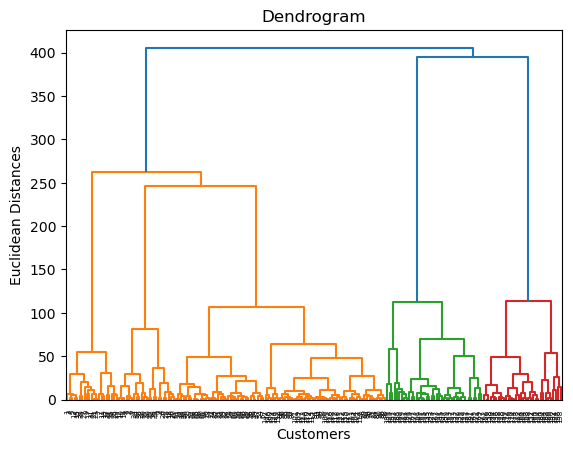

In [4]:
import scipy.cluster.hierarchy as sch # module with dendrogram functionality
# argument is a linkage function which takes the matrix of features from which to form the clusters 
# followed by the clustering method and the commonest one is the method of min variance - minimises the variance in each of the clusters and the method is called 'ward'abs
dendrogram = sch.dendrogram(sch.linkage(x, method='ward' ))
plt.title('Dendrogram')
plt.xlabel('Customers') # usually its the rows i.e.observation points
plt.ylabel('Euclidean Distances') # distances between each pair of customers / between the groups
plt.show()

- x - axis is the customers listed from 1 to 200
- y - euclidean distances between first each pair of customers and then distance between the groups

- Longest vertical distance is between 100 Euclidean distance and  and 240 leading to an optimal cluster value of 3 but it is possible that 3 could be a good value too


#### Training the Hierarchical clustering model on the dataset

In [5]:
# We need to use the skLearn model as it has the Agglomerative clustering class 
from sklearn.cluster import AgglomerativeClustering
#parameter = number of clusters, affinity is type of distance that will be computed
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

#fit the model - fit predict will create the dependent variable of  the cluster
y_hc = hc.fit_predict(x)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [6]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### Visualising clusters

- involves creating scatter plots for each cluster

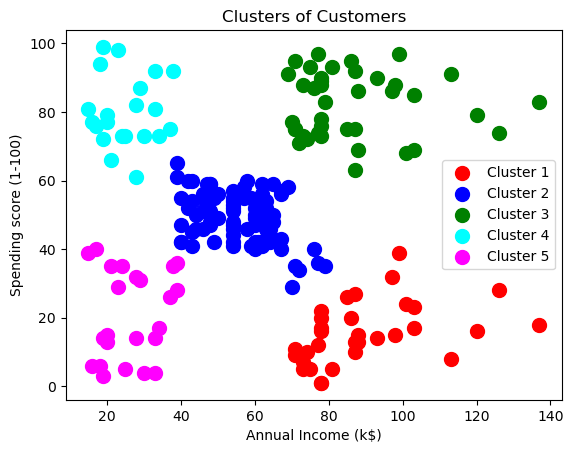

In [10]:
#rows of cluster 0 - y_kmeans ==0  - this is the rows, 0 is the first column which will be the first coordinate 
#the 1 here indicates the spending column
#s = size, c= color
plt.scatter(x[y_hc ==0,0], x[y_hc ==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_hc ==1,0], x[y_hc ==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_hc ==2,0], x[y_hc ==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_hc ==3,0], x[y_hc ==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_hc ==4,0], x[y_hc ==4, 1], s=100, c='magenta', label='Cluster 5')

#plot the centroids of each cluster using cluster_centres method
#plt.scatter(hc.cluster_centers_[:,0],hc.cluster_centers_[:,1], s=300, color='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

#### Insights

- cluster 5 - show low income customers who spend few in the mall
- cluster 4 - high income customers who do not spend a lot  in the mall
- cluster 3 - low income customers who spend a lot at the mall
- cluster 2 - customers on a high annual income and spend a lot
- cluster 1 - customers on an average annual income and with average spending at the mall

Business Strategies
- cluster 2 could be targetted with new offers as they are likely to buy the new product and have high potential for buying
- cluster 3 - customers could be protected by not targetting them with irresistible offers in the name of social responsibility
- cluster 5 customers could not be targetted or protected either
- high income and low spend  - custer 4  - brain storm on how to attract them to increase their spending score
- cluster 1 probably do nothing with them.

Clustering identifies different groups of customers and clustering provides insights into how to utilise clustering information.

